In [1]:
import sys
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from collections import Counter

In [2]:
plt.style.use('ggplot')

In [3]:
url_Sep2015 = 'https://storage.googleapis.com/tlc-trip-data/2015/green_tripdata_2015-09.csv'
fname = "green_tripdata_2015-09.csv"

In [58]:
r = requests.get(url_Sep2015)
with open("Data\green_tripdata_2015-09.csv", "wb") as code:
    code.write(r.content)

In [4]:
sep15df = pd.read_csv("Data\green_tripdata_2015-09.csv")

In [5]:
print "Number of rows:", sep15df.shape[0], "Number of columns:", sep15df.shape[1]

Number of rows: 1494926 Number of columns: 21


In [6]:
sep15df.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type '],
      dtype='object')

In [7]:
sep15df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1494926.000000,1494926.000000,1494926.000000,1494926.000000,1494926.000000,1494926.000000,1494926.000000,1494926.000000,1494926.000000,1494926.00000,1494926.000000,1494926.000000,1494926.000000,0,1494926.000000,1494926.000000,1494926.000000,1494922.000000
mean,1.782045,1.097653,-73.830839,40.691144,-73.837278,40.692905,1.370598,2.968141,12.543198,0.35128,0.486641,1.235727,0.123105,NaN,0.292099,15.032146,1.540559,1.022353
std,0.412857,0.635944,2.776082,1.530882,2.677911,1.476698,1.039426,3.076621,10.082781,0.36631,0.085045,2.431476,0.891014,NaN,0.050740,11.553155,0.523293,0.147829
min,1.000000,1.000000,-83.319077,0.000000,-83.427841,0.000000,0.000000,0.000000,-475.000000,-1.00000,-0.500000,-50.000000,-15.290000,NaN,-0.300000,-475.000000,1.000000,1.000000
25%,2.000000,1.000000,-73.959610,40.698952,-73.967819,40.698776,1.000000,1.100000,6.500000,0.00000,0.500000,0.000000,0.000000,NaN,0.300000,8.160000,1.000000,1.000000
50%,2.000000,1.000000,-73.945358,40.746738,-73.945038,40.747284,1.000000,1.980000,9.500000,0.50000,0.500000,0.000000,0.000000,NaN,0.300000,11.760000,2.000000,1.000000
75%,2.000000,1.000000,-73.917480,40.802551,-73.910133,40.790146,1.000000,3.740000,15.500000,0.50000,0.500000,2.000000,0.000000,NaN,0.300000,18.300000,2.000000,1.000000
max,2.000000,99.000000,0.000000,43.177261,0.000000,42.799343,9.000000,603.100000,580.500000,12.00000,0.500000,300.000000,95.750000,NaN,0.300000,581.300000,5.000000,2.000000


In [8]:
sep15df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0,NaN,0.0,9.75,1,2
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0,NaN,0.0,45.00,1,2
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0,NaN,0.3,5.80,1,1
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0,NaN,0.3,6.30,2,1
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0,NaN,0.3,6.30,2,1


In [9]:
#Look at min and max of trip distance
print min(sep15df['Trip_distance']), max(sep15df['Trip_distance'])

0.0 603.1


### Remove zero trip distance rows from data

In [10]:
sep15dfnz = sep15df.iloc[np.nonzero(sep15df['Trip_distance'])[0],]

In [11]:
trip_dist = sep15dfnz['Trip_distance'].values
print "Min trip distance:", min(trip_dist), "Max trip distance:", max(trip_dist), "Number of rows:", len(trip_dist)

Min trip distance: 0.01 Max trip distance: 603.1 Number of rows: 1474334


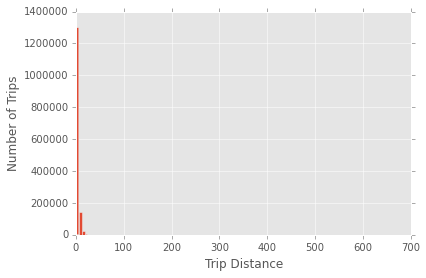

In [106]:
plt.hist(trip_dist, 100)
plt.grid(True)
plt.xlabel('Trip Distance')
plt.ylabel('Number of Trips')
plt.show()

## As we can see in the histogram above, the distribution is highly skwed to the right. Our hypothesis is that majority of the trips are between 0-10 miles. So will plot the x-axis between 0-10 in linear scale and rest in log scale using symlog

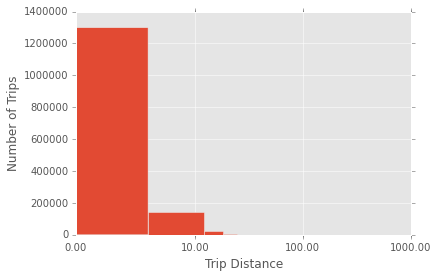

In [109]:
from matplotlib import ticker
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xscale('symlog', basex=10, linthreshx=10)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.hist(trip_dist, 100)
plt.grid(True)
plt.xlabel('Trip Distance')
plt.ylabel('Number of Trips')
plt.show()

## With this histogram, we can see that majority of the trips are between 0-5 miles and then between 5-10 miles. We will zoom into the trip distance in linear scale only between 0-10 miles

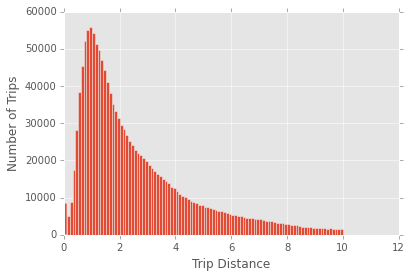

In [110]:
plt.hist(filter(lambda x: x <= 10.0, trip_dist), 100)
plt.xlabel('Trip Distance')
plt.ylabel('Number of Trips')
plt.grid(True);

## Now the shape of the distribution is more evident. Our hypothesis is that we can fit a lognormal distibution the data. A log normal distribution is induced in nature when the effect of iid random variables is multiplicative instead of additive. In other words, the effects are non-linear. An indication of such phenomenon is when the variance in the data is large compared to the mean values

## Estimating the distribution of the random variable helps in simulation. Simulation is used for experimenting with random variable behavior when controls are altered

In [15]:
print "Mean:", np.mean(trip_dist), "  Variance:", np.var(trip_dist)

Mean: 3.00959682813   Variance: 9.47302923371


## We will take average of pick-up and drop of time as time of day. As we see below, the time is in 24 hour format

In [16]:
print sep15dfnz["lpep_pickup_datetime"].head(),  sep15dfnz["lpep_pickup_datetime"].tail()

2    2015-09-01 00:01:50
3    2015-09-01 00:02:36
4    2015-09-01 00:00:14
5    2015-09-01 00:00:39
6    2015-09-01 00:00:52
Name: lpep_pickup_datetime, dtype: object 1494921    2015-09-30 23:00:01
1494922    2015-09-30 23:00:05
1494923    2015-09-30 23:00:30
1494924    2015-09-30 23:00:10
1494925    2015-09-30 23:00:11
Name: lpep_pickup_datetime, dtype: object


In [17]:
#datetime.strptime(sep15dfnz["lpep_pickup_datetime"].values[10000], "%Y-%m-%d %H:%M:%S").hour
#sep15dfnz.drop('trip_hr', axis=1, inplace=True)

In [18]:
sep15dfnz.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type '],
      dtype='object')

In [80]:
dformat = "%Y-%m-%d %H:%M:%S"
sep15dfnz.loc[sep15dfnz.index,"trip_hr"]= [round(np.mean([datetime.strptime(x, dformat).hour, datetime.strptime(y, dformat).hour]))\
                          for x,y in zip(sep15dfnz["lpep_pickup_datetime"].values, sep15dfnz["Lpep_dropoff_datetime"].values)] ; 

In [20]:
#np.mean([x for (x,y) in zip(sep15dfnz['Trip_distance'].values, sep15dfnz['trip_hr'].values) if y == 5])
tripDistMeanByHr = sep15dfnz.groupby(by="trip_hr")['Trip_distance'].mean()

In [21]:
#Printing mean of Trip Distance by hour
tripDistMeanByHr

trip_hr
0     2.751526
1     3.161032
2     3.193260
3     3.275183
4     3.505923
5     4.253349
6     4.011083
7     3.282965
8     2.964701
9     3.066708
10    3.058976
11    2.950696
12    3.413571
13    2.941764
14    2.819376
15    2.833838
16    2.815830
17    2.727801
18    2.702913
19    2.769204
20    2.827541
21    2.960170
22    3.180878
23    3.255221
Name: Trip_distance, dtype: float64

In [22]:
tripDistMedianByHr = sep15dfnz.groupby(by="trip_hr")['Trip_distance'].median()

In [23]:
tripDistMedianByHr

trip_hr
0     1.98
1     2.23
2     2.25
3     2.30
4     2.41
5     3.00
6     2.81
7     2.10
8     1.90
9     2.00
10    2.00
11    1.90
12    2.27
13    1.90
14    1.82
15    1.82
16    1.81
17    1.79
18    1.80
19    1.88
20    1.94
21    2.03
22    2.20
23    2.29
Name: Trip_distance, dtype: float64

## We will calculate the most common pick-up or drop off point from the whole dataset. We will round the latitude, longitude to 2 decimal places as the GPS readings beyond 2 decimal places do not matter for this problem

In [24]:
#Pickup_longitude, Pickup_latitude, Dropoff_longitude, Dropoff_latitude
allPoints = [(round(x,2),round(y,2)) for (x,y) in zip(sep15dfnz["Pickup_latitude"].values, sep15dfnz["Pickup_longitude"].values)] \
          + [(round(x,2),round(y,2)) for (x,y) in zip(sep15dfnz["Dropoff_latitude"].values, sep15dfnz["Dropoff_longitude"].values)]

In [25]:
maxPoint = Counter(allPoints).most_common()

In [26]:
maxPoint[:10]

[((40.72, -73.96), 76320),
 ((40.81, -73.95), 72439),
 ((40.81, -73.94), 71340),
 ((40.69, -73.99), 71135),
 ((40.79, -73.95), 71097),
 ((40.8, -73.94), 58272),
 ((40.75, -73.89), 54667),
 ((40.81, -73.96), 51268),
 ((40.68, -73.98), 49165),
 ((40.7, -73.99), 48749)]

## As we can see, the location (40.72, -73.96) has maximum number of pick-ups and drop offs (76320). Incidentally these co-ordinates are close to the JFK airport

In [27]:
tripIndexes = [ix for (ix,y,z) in zip(sep15dfnz.index,
                                    zip(sep15dfnz["Pickup_latitude"].values, sep15dfnz["Pickup_longitude"].values),
                                    zip(sep15dfnz["Dropoff_latitude"].values, sep15dfnz["Dropoff_longitude"].values)) \
               if ((round(y[0],2) == maxPoint[0][0][0]) and (round(y[1],2) == maxPoint[0][0][1])) or \
               ((round(z[0],2) == maxPoint[0][0][0]) and (round(z[1],2) == maxPoint[0][0][1]))]

## So the average fare for pick-up and drop-off that location is -

In [28]:
np.mean(sep15dfnz.ix[tripIndexes,"Fare_amount"])

13.25374772294863

## As we can see below, there are some neagative and zero fare amounts in the data

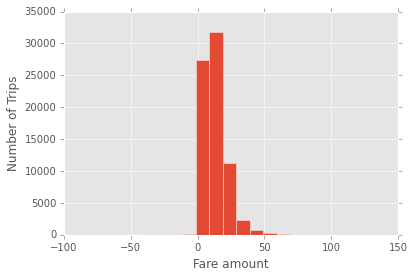

In [111]:
plt.hist(sep15dfnz["Fare_amount"][tripIndexes].values, 20);
plt.xlabel('Fare amount')
plt.ylabel('Number of Trips')
plt.grid(True)

In [30]:
len(sep15dfnz.loc[tripIndexes, "Fare_amount"][sep15dfnz.loc[tripIndexes, "Fare_amount"]<=0])

69

## We assume that fares <=0 is a data error and we recalculate the average fare based on non-zero and absolute values

In [31]:
sep15dfnzfare = sep15dfnz.loc[tripIndexes, :][sep15dfnz.loc[tripIndexes, "Fare_amount"]<>0]
np.mean(np.abs(sep15dfnzfare["Fare_amount"].values))

13.262762850703769

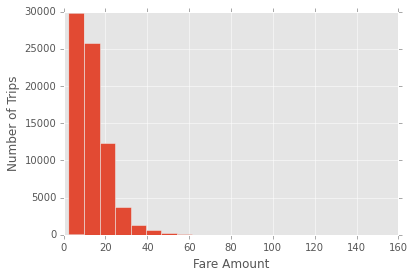

In [112]:
plt.hist(np.abs(sep15dfnzfare["Fare_amount"].values), 20);
plt.xlabel('Fare Amount')
plt.ylabel('Number of Trips')
plt.grid(True)

## Zooming into fares below $60

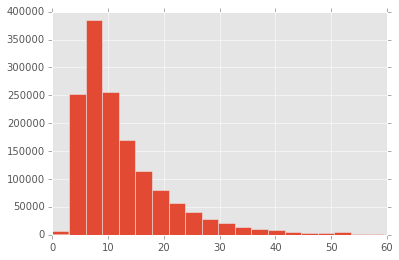

In [159]:
plt.hist(abs(sep15dfnzfareall.loc[abs(sep15dfnzfareall['Fare_amount'])<60, 'Fare_amount'].values), 20);

## As seen above, fare amount is also a skewed distribution

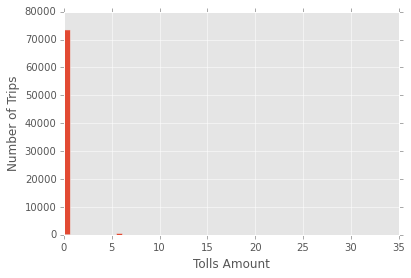

In [113]:
plt.hist(sep15dfnzfare["Tolls_amount"].values, 50);
plt.xlabel('Tolls Amount')
plt.ylabel('Number of Trips')
plt.grid(True)

## Tolls amount is pretty constant as expected. Most of the green taxis are paying 1 or 2 tolls on entering the City. So is the MTA Tax amount constant as seen below

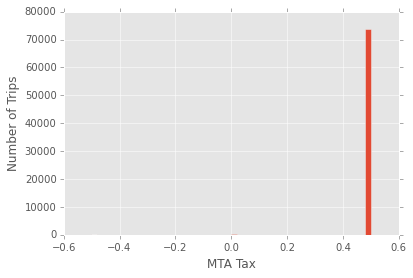

In [114]:
plt.hist(sep15dfnzfare["MTA_tax"].values, 50);
plt.xlabel('MTA Tax')
plt.ylabel('Number of Trips')
plt.grid(True)

## As can be seen below, the fare amount in yellow is sometime exceeding total amount in red. This implies there are still some quality issues with the data.

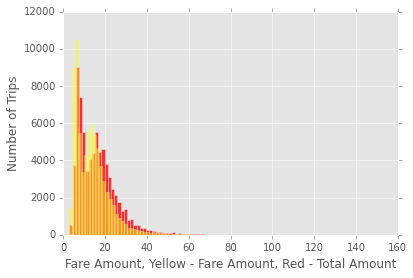

In [116]:
plt.hist(np.abs(sep15dfnzfare["Total_amount"].values), 100, color='red', alpha=0.8);
plt.hist(np.abs(sep15dfnzfare["Fare_amount"].values), 100, color='yellow', alpha=0.5);
plt.xlabel('Fare Amount, Yellow - Fare Amount, Red - Total Amount')
plt.ylabel('Number of Trips')
plt.grid(True)

## Building the derived variable

In [36]:
#Further filtering the dataframe for Non-zero fares
sep15dfnzfareall = sep15dfnz.loc[sep15dfnz.loc[:, "Fare_amount"]<>0, :]

## Upper Manhattan is around the co-ordinates (40.82, -73.94)

In [37]:
sep15dfnzfareall.loc[:,'tip_ratio'] = 100*sep15dfnzfareall['Tip_amount']/sep15dfnzfareall['Fare_amount']

In [38]:
index_UM = [ix for (ix, x,y) in zip(sep15dfnzfareall.index, sep15dfnzfareall['Pickup_latitude'].values, \
                                    sep15dfnzfareall['Pickup_longitude'].values)\
            if (round(x,2) == 40.82) and (round(y,2) == -73.94)]

## Distribution of tip ratio in upper Manhattan

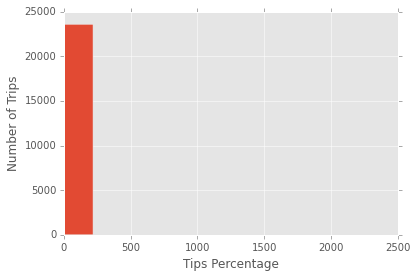

In [105]:
tipsUM = sep15dfnzfareall.loc[index_UM, 'tip_ratio'].values
plt.hist(tipsUM, 10);
plt.xlabel('Tips Percentage')
plt.ylabel('Number of Trips')
plt.grid(True)

## Let us zoom into the tip ratio in lower percentage region for Upper Manhattan

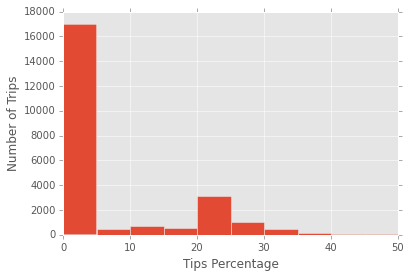

In [102]:
plt.hist(filter(lambda x: x <= 50.0, tipsUM), 10)
plt.xlabel('Tips Percentage')
plt.ylabel('Number of Trips')
plt.grid(True)

## Distribution of tip ratio in outer boroughs

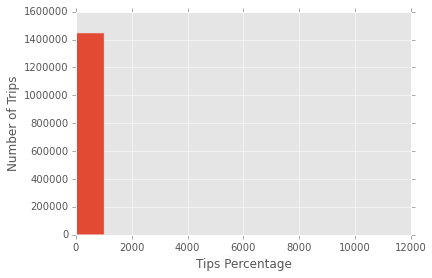

In [104]:
tipsOB = sep15dfnzfareall.loc[~sep15dfnzfareall.index.isin(index_UM), 'tip_ratio'].values
plt.hist(tipsOB, 10);
plt.xlabel('Tips Percentage')
plt.ylabel('Number of Trips')
plt.grid(True)

## Let us zoom into the tip ratio in lower percentage region for Outer Borough

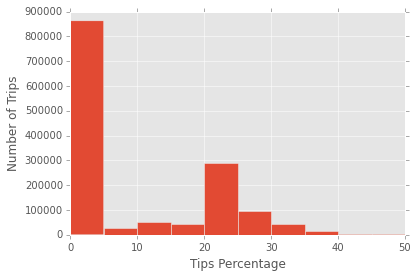

In [103]:
plt.hist(filter(lambda x: x <= 50.0, tipsOB), 10)
plt.xlabel('Tips Percentage')
plt.ylabel('Number of Trips')
plt.grid(True)

## As can be seen, tips in upper Manhattan follow similar distribution as tips on outer Borough
## Also a large percentage of tips are zero in both regions. We can look at the distribution of tips against payment type to see whether there are any obvious pattern

In [43]:
sep15dfnzfareall.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type ', u'trip_hr', u'tip_ratio'],
      dtype='object')

In [44]:
labels = {1:'Credit card', 2:'Cash', 3:'No charge', 4:'Dispute', 5:'Unknown', 6:'Voided trip'}

In [45]:
sep15dfnzfareall.loc[sep15dfnzfareall.index,'Payment_label'] = \
[labels[ix] for ix in sep15dfnzfareall.loc[sep15dfnzfareall.index,'Payment_type']]

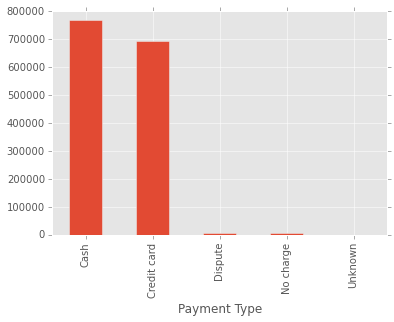

In [46]:
sep15dfnzfareall.groupby(['Payment_label']).size().plot(kind='bar').set_xlabel('Payment Type');

## As can be seen above, most of the payment types is cash

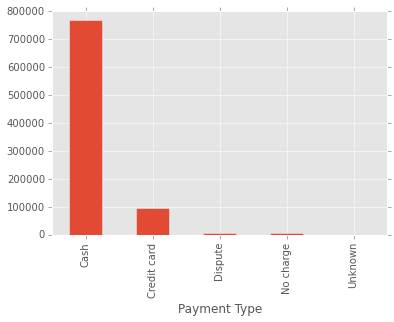

In [48]:
sep15dfnzfareall[sep15dfnzfareall['tip_ratio']== 0].groupby(['Payment_label']).size().plot(kind='bar').set_xlabel('Payment Type');

## As can be seen above, tip ratio is zero predominantly for cash payments. This might be due to tips not being reported by the drivers

In [71]:
sep15dfnzfareall.head(1)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,trip_hr,tip_ratio,Payment_label
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.92141,40.766708,-73.914413,40.764687,1,...,0.5,0,NaN,0.3,5.8,1,1,0,12.5,Credit card


In [73]:
sep15dfnzfareall.loc[0:2,].values

array([[2L, '2015-09-01 00:01:50', '2015-09-01 00:04:24', 'N', 1L,
        -73.92140960693358, 40.76670837402344, -73.91441345214845,
        40.764686584472656, 1L, 0.59, 4.0, 0.5, 0.5, 0.5, 0.0, nan, 0.3,
        5.8, 1L, 1.0, 0.0, 12.5, 'Credit card']], dtype=object)

## Now we will fit a random forest model to our data to predict tip ratio

### We first start with looking at the overall distribution of tip ratio, for ratio below 50

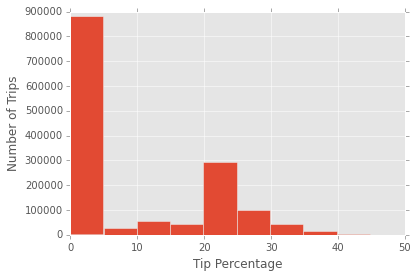

In [117]:
plt.hist(sep15dfnzfareall[sep15dfnzfareall['tip_ratio']< 50]['tip_ratio'].values, 10);
plt.xlabel('Tip Percentage')
plt.ylabel('Number of Trips')

### Get our predictors X and response variable y
### We use the average trip time variable (trip_hr) instead of the pick-up and drop-off date time variables. We also drop the 'Ehail_fee' column as it has nan values. We also need a numeric equivalent of Store_and_fwd_flag

In [74]:
labels1 = {'N':0, 'Y':1}
sep15dfnzfareall.loc[sep15dfnzfareall.index,'SF_n'] = \
[labels1[ix] for ix in sep15dfnzfareall.loc[sep15dfnzfareall.index,'Store_and_fwd_flag']]

### We will create buckets in the response variable (tip_ratio) for classification algorithm

In [94]:
bins = np.array([0.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0])
sep15dfnzfareall.loc[sep15dfnzfareall.index,'tip_ratio_c'] = bins.searchsorted(sep15dfnzfareall['tip_ratio'])

In [96]:
sep15dfnzfareall.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type ', u'trip_hr', u'tip_ratio', u'Payment_label', u'SF_n',
       u'tip_ratio_c'],
      dtype='object')

In [97]:
y = sep15dfnzfareall['tip_ratio_c']
X = sep15dfnzfareall[['VendorID', 'RateCodeID', 'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra','MTA_tax', 'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type','Trip_type ', 'trip_hr',  'SF_n']]

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [176]:
rf = RandomForestClassifier(n_estimators = 100, n_jobs=2)
scores = cross_val_score(rf, X, y, cv=5)
scores.mean()

0.99553704177281011

## As we can see, 5-fold cross-validation accuracy is quite good for this multiclass classifier. We can also examine the ROC curves for each of the classes as below

In [179]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

In [336]:
# Learn to predict each class against the other
yb = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
X_train, X_test, y_train, y_test = train_test_split(X, yb, test_size=.5,
                                                    random_state=0)
n_classes = yb.shape[1]
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 20, n_jobs=2))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [350]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

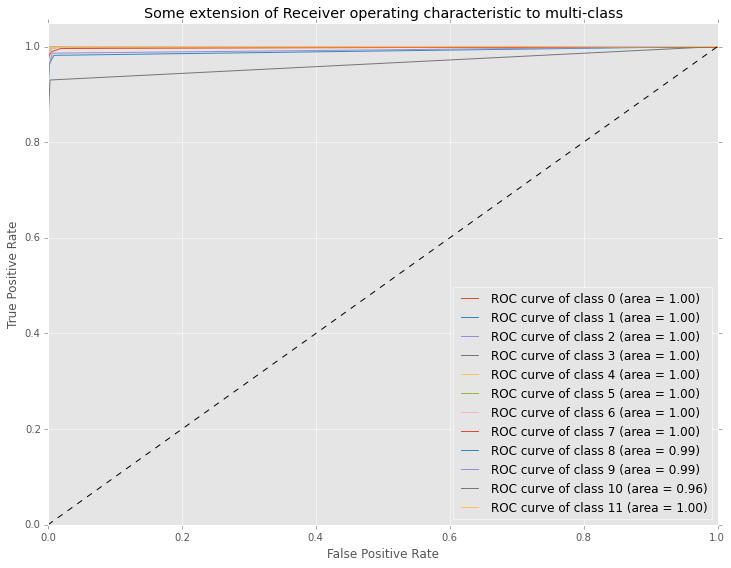

In [351]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

## As seen above classification error (prediction of tip ratio in the range) is zero in most ranges. As areminder these are the ranges of the tip ratio that we are trying to predict - [0.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0]. Tip ratio above 55% is placed in the last range

## As we see below, the Random Forest classifier with only 2 classes also yields good cross-validation accuracy

In [160]:
bins1 = np.array([0.0, 20.0])
sep15dfnzfareall.loc[sep15dfnzfareall.index,'tip_ratio_c2'] = bins1.searchsorted(sep15dfnzfareall['tip_ratio'])

In [161]:
y2 = sep15dfnzfareall['tip_ratio_c2']

In [177]:
rf2 = RandomForestClassifier(n_estimators = 100, n_jobs=2)
scores2 = cross_val_score(rf2, X, y2, cv=5)
scores2.mean()

0.99916493763405168

## Option A: Distributions

### Creating average speed column in miles/hr

In [396]:
dformat = "%Y-%m-%d %H:%M:%S"

sep15dfnzfareall.loc[sep15dfnzfareall.index,"trip_time"]= \
[(datetime.strptime(y, dformat) - datetime.strptime(x, dformat)).total_seconds()/3600.0 \
 for x,y in zip(sep15dfnzfareall["lpep_pickup_datetime"].values, sep15dfnzfareall["Lpep_dropoff_datetime"].values)] ;

#Take non zero trip time rows
sep15AvgSpeed = sep15dfnzfareall[sep15dfnzfareall['trip_time']<>0]

In [397]:
sep15AvgSpeed.loc[:,'avg_speed'] = sep15AvgSpeed['Trip_distance']/sep15AvgSpeed['trip_time']

In [399]:
sep15AvgSpeed['avg_speed'].describe()

count    1470407.000000
mean          15.925150
std          216.751966
min            0.000417
25%            9.422028
50%           11.833910
75%           15.126050
max       202680.000000
Name: avg_speed, dtype: float64

## Let us create a column for week number. We will extract the week from pick-up time for simplicity. We will get the week from the ISO week (each year has 52 weeks) returned by the datetime function isocalendar()

In [403]:
sep15AvgSpeed.loc[sep15AvgSpeed.index,"iso_week"] = \
[datetime.strptime(x, dformat).isocalendar()[1] for x in sep15AvgSpeed["lpep_pickup_datetime"].values]

In [405]:
set(sep15AvgSpeed["iso_week"])

{36, 37, 38, 39, 40}

## We run the following ANOVA test with the null hypothesis that average speed on all weeks are equal

In [406]:
from scipy import stats

In [429]:
weeklySpeeds = sep15AvgSpeed.groupby(by="iso_week")['avg_speed'].apply(lambda x: x.tolist())

_, p_val = stats.f_oneway(weeklySpeeds[36], \
                              weeklySpeeds[37], \
                              weeklySpeeds[38], \
                              weeklySpeeds[39], \
                              weeklySpeeds[40])
  
print "One-way ANOVA P =", p_val 

One-way ANOVA P = 0.0463751450172


## As the p value is less than 0.05, the null hypothesis that average speed on all weeks are equal is rejected. Let us plot the distribution of speed over weeks

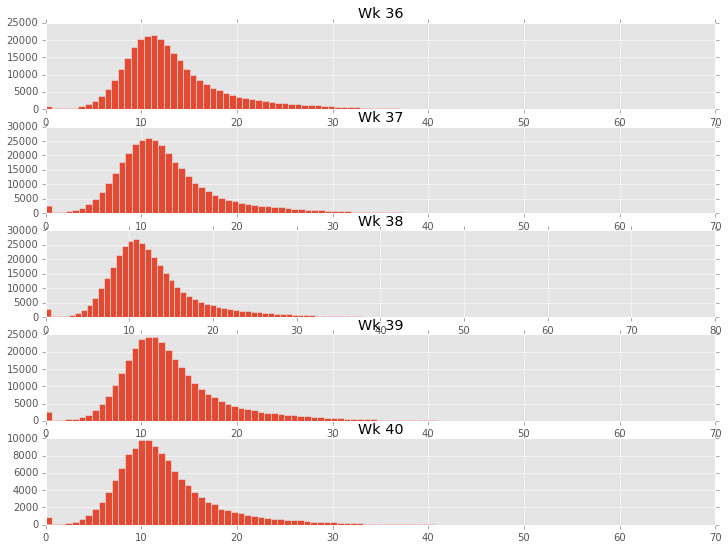

In [451]:
plt.figure(1)
plt.subplot(511)
plt.title("Wk 36")
plt.hist(filter(lambda x: x <= 70.0, weeklySpeeds[36]), bins=100);
plt.subplot(512)
plt.title("Wk 37")
plt.hist(filter(lambda x: x <= 70.0, weeklySpeeds[37]), bins=100);
plt.subplot(513)
plt.title("Wk 38")
plt.hist(filter(lambda x: x <= 70.0, weeklySpeeds[38]), bins=100);
plt.subplot(514)
plt.title("Wk 39")
plt.hist(filter(lambda x: x <= 70.0, weeklySpeeds[39]), bins=100);
plt.subplot(515)
plt.title("Wk 40")
plt.hist(filter(lambda x: x <= 70.0, weeklySpeeds[40]), bins=100);
plt.show()

## After visual inspection of the means and trying different combinations, we can see below that weeks 36, 39 and 40 have same average speeds at 5% level of significance. Similarly, weeks 37 and 38 have same average speeds at 5% level of significance

In [463]:
_, p_val = stats.f_oneway(weeklySpeeds[36],     \
                              weeklySpeeds[39], \
                              weeklySpeeds[40])
  
print "One-way ANOVA P =", p_val 

One-way ANOVA P = 0.492193530116


In [459]:
_, p_val = stats.f_oneway(weeklySpeeds[37], \
                              weeklySpeeds[38])
  
print "One-way ANOVA P =", p_val 

One-way ANOVA P = 0.781297410955
